<a href="https://colab.research.google.com/github/waitaminutewhoareyou/Pricing-Options-with-Mathematical-Model/blob/main/Problem_Set_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Question 1

A bank offers a 5-year instrument that promises to repay the initial invested amount (with zero interest) if SP 500 index experiences a gain during the 5-year period, and, in addition to that amount, if SP 500 experiences a loss, it promises to pay 80% of the relative return on the invested amount, where the relative return is computed as the absolute value of the percentage loss in SP 500.

 
This contract is equivalent to a position in



*   a combination of a bond and a put options because it pays at a fixed rate but also you profit from the drop of the price.



In [ ]:
class compute_total_profit:
  def __init__(self,
               long_short_indicator,
               buy_sell_indicator,
               num_shares, 
               forward_price,
               num_options,
               price_options,
               price_at_maturity):
    
    self.long_short_indicator = long_short_indicator
    self.buy_sell_indicator = buy_sell_indicator
    self.num_shares = num_shares
    self.forward_price = forward_price
    self.num_options = num_options
    self.price_options = price_options
    self.price_at_maturity = price_at_maturity

  def profit_from_postions(self):
    return self.num_shares * (self.price_at_maturity - self.forward_price) *self.long_short_indicator

  def profit_from_single_option(self):
    if self.price_at_maturity  > 55:
      return self.price_at_maturity - self.price_options

    if self.price_at_maturity < 55:
      return 50 - self.price_options
  
  def profit_from_options(self):
    return self.buy_sell_indicator * (self.num_options * self.profit_from_single_option())

  def compute_total_profit(self):
    return self.profit_from_options() + self.profit_from_postions()

long_short_indicator = -1
buy_sell_indicator = -1
num_shares = 8
forward_price = 52
num_options = 2
price_options = 53

Question 2

At time zero you enter a short position in forward contracts on 8 shares of the stock XYZ at the forward price of 52.00. Moreover, you sell (write) 2 exotic options, with the same maturity as the forward contracts, each of which gives the holder one share of the stock (only) if the price of one share is above 55.00 and which pays the holder 50.00 (only) if the price is below 55.00. The today's selling price of one option of this kind is 53.00. Assume that, after those trades are put in place, the initial capital you have (need) is invested (borrowed) at zero interest rate. In your answer, use minus sign for a loss.

 
Enter your total profit or loss if at maturity the price of one stock share is 58.00:

In [ ]:

price_at_maturity = 58

calculator = compute_total_profit(long_short_indicator,
                                  buy_sell_indicator,
                                num_shares, 
                                forward_price,
                                num_options,
                                price_options,
                                price_at_maturity)

calculator.compute_total_profit()

-58

Question 3

Continuing the same scenario from Question 2:

Enter your total profit or loss if at maturity the price of one stock share is 47.00:

In [ ]:

price_at_maturity = 47

calculator = compute_total_profit(long_short_indicator,
                                  buy_sell_indicator,
                                num_shares, 
                                forward_price,
                                num_options,
                                price_options,
                                price_at_maturity)

calculator.compute_total_profit()

46

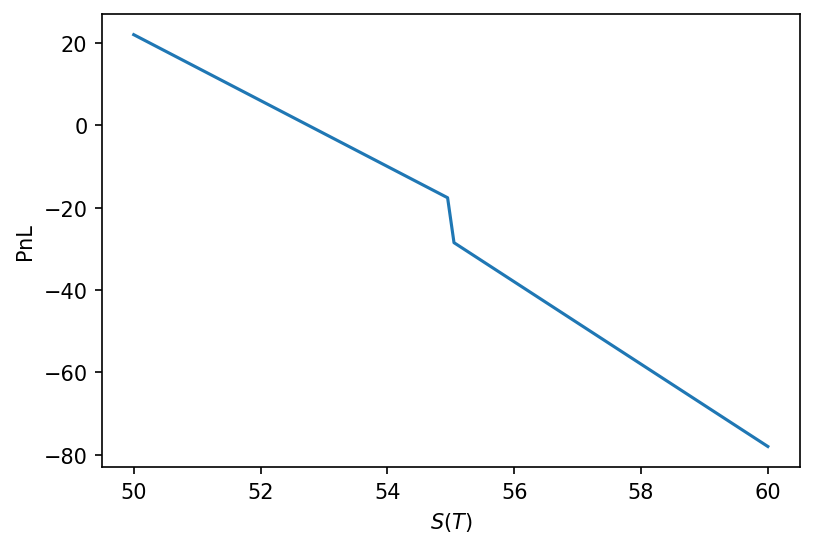

In [37]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(dpi=150)

xs = np.linspace(50, 60, 100)
pnls = []
for x in xs:
  pnl = compute_total_profit(long_short_indicator,
                                  buy_sell_indicator,
                                num_shares, 
                                forward_price,
                                num_options,
                                price_options,
                                x).compute_total_profit()
  pnls.append(pnl)
ax.plot(xs, pnls)
ax.set_ylabel("PnL")
ax.set_xlabel("$S(T)$")
plt.show()



Question 4

Suppose company A can borrow USD at the rate of 6%, and euros at the rate of 11%. Company B can borrow USD at the rate of 4%, and euros at the rate of 10%. Suppose that company A needs to borrow USD, and company B needs to borrow euros. Suppose company A enters a swap contract with a bank, paying 5% on USD and receiving 11% on euros. Company B enters a swap contract with the bank, receiving 4% on USD and paying 9% on euros. In the following, you may ignore the exchange rate risk and the credit risk. Use the minus sign for losses, and do not write the percentage sign.

 
Enter the expected percentage aggregate gain/loss for all parties:

In [ ]:
(6-4) - (11-10)

1

Question 5

Continuing the same scenario from Question 4:

Enter the expected percentage aggregate gain/loss for company A:

In [ ]:
(6-5) + (11-11)

1

Question 6

Enter the expected percentage aggregate gain/loss for company B:

In [ ]:
(10 - 9) + (4-4)

1

Question 7

Continuing the same scenario from Question 4:

Enter the expected percentage aggregate gain/loss for the bank:

In [ ]:
# Gain on USD
gain_on_usd = 5 - 4
gain_on_eur = -11 + 9
gain_on_usd + gain_on_eur

-1

Question 8

Suppose you promised your child a hundred shares of stock A for her eighteenth birthday, one year ahead.

 
Which one of the following you may want to do to hedge this promise?

Buy call options, in this case the price of the stock A rises in one year (in which case you need to pay more for your child), you can offset this cost with the gain from the call options.

Question 9

We want to show that the payoff of one unit of the bear spread can be created from long/short positions in call options. For short positions, use negative numbers. Suppose the bear spread points are K1 and K2, K2>K1, that is, the payoff is zero when the price S of the underlying is below K1, it is K1-K2 when S is above K2, and it is K1 – S for S between K1 and K2.

 
Enter the number of required call options with strike price equal to K1

* -1. Recoginize that when S is between K1 and K2, your payoff is K1-S, which means the higher the spot price, the lower your payoff, you must be shorting a call options


Question 10

Continuing the same scenario from Question 9:

Enter the number of required call options with strike price equal to K2

* 1. The payoff above K2 is given by 
  payoff from call options with K1 + 
  payoff from call options with K2 
   = (K1 - S) + (S - K2)
   = K1 - K2